In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage import io, color
from skimage.morphology import disk
import os
print(os.listdir("/content/drive/MyDrive/ulcer/"))
base_dir = "/content/drive/MyDrive/ulcer"

['Image_1.jpg', 'Image_10.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg', 'Image_17.jpg', 'Image_18.jpg', 'Image_19.jpg', 'Image_2.jpg', 'Image_20.jpg', 'Image_21.jpg', 'Image_22.jpg', 'Image_23.jpg', 'Image_24.jpg', 'Image_25.jpg', 'Image_26.jpg', 'Image_27.jpg', 'Image_28.jpg', 'Image_29.jpg', 'Image_3.jpg', 'Image_30.jpg', 'Image_31.jpg', 'Image_32.jpg', 'Image_33.jpg', 'Image_34.jpg', 'Image_35.jpg', 'Image_36.jpg', 'Image_37.jpg', 'Image_38.jpg', 'Image_39.jpg', 'Image_4.jpg', 'Image_40.jpg', 'Image_41.jpg', 'Image_42.jpg', 'Image_43.jpg', 'Image_44.jpg', 'Image_45.jpg', 'Image_46.jpg', 'Image_47.jpg', 'Image_48.jpg', 'Image_49.jpg', 'Image_5.jpg', 'Image_50.jpg', 'Image_51.jpg', 'Image_52.jpg', 'Image_53.jpg', 'Image_54.jpg', 'Image_55.jpg', 'Image_56.jpg', 'Image_57.jpg', 'Image_58.jpg', 'Image_59.jpg', 'Image_60.jpg', 'Image_6.jpg', 'Image_61.jpg', 'Image_62.jpg', 'Image_63.jpg', 'Image_64.jpg', 'Image_65.jpg', 'Image_66.jpg

In [ ]:
import random
test_dir = "/content/drive/MyDrive"
folders = os.listdir(test_dir)
num = 1
path = test_dir+"/"+folders[num]
print(path)
label = folders[num]
files = os.listdir(path)
num = random.randint(0, len(files)-1)
name = path + "/" + files[num]
print('Path: ', name)

/content/drive/MyDrive/ulcer
Path:  /content/drive/MyDrive/ulcer/Image_31.jpg


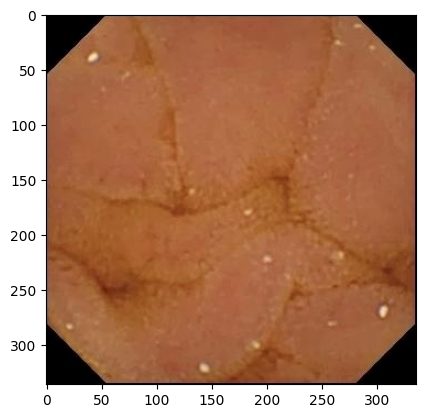

In [ ]:
image =cv.imread(name)
image =cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

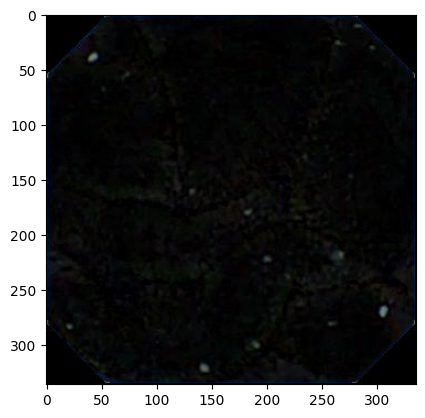

In [ ]:
beta=12
kernel = disk(beta)
topHat_img = cv.morphologyEx(image,cv.MORPH_TOPHAT,kernel)
plt.imshow(topHat_img)

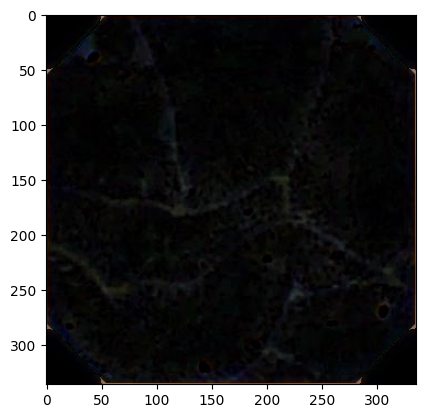

In [ ]:
kernel = disk(beta)
bottomHat_img = cv.morphologyEx(image, cv.MORPH_BLACKHAT,kernel)
plt.imshow(bottomHat_img)

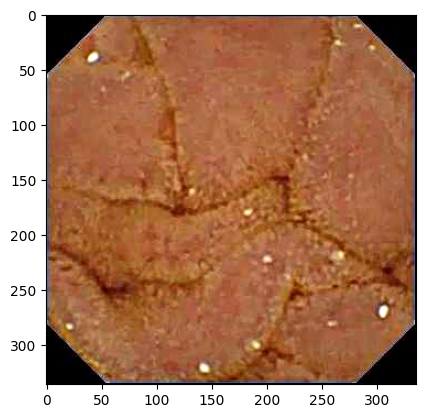

In [ ]:
topBottom_img=cv.subtract(cv.add(topHat_img,image), bottomHat_img)
plt.imshow(topBottom_img)

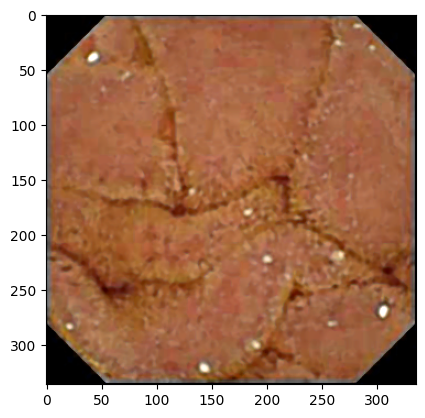

In [ ]:
alpha = (3, 3, 3)
median_topBottom_img= scipy.ndimage.median_filter(topBottom_img, alpha)
plt.imshow(median_topBottom_img)

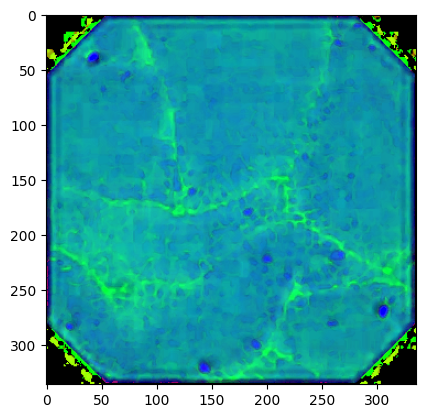

In [ ]:
sample=median_topBottom_img
sample_h= color.rgb2hsv(sample)
plt.imshow(sample_h)

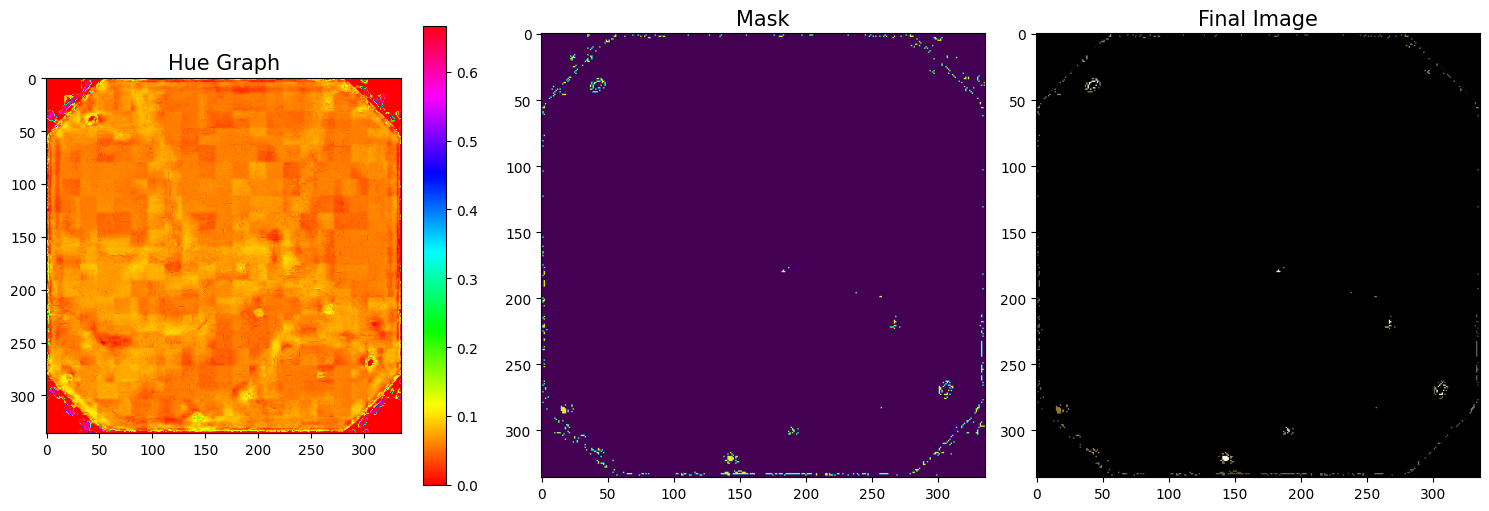

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
im = ax[0].imshow(sample_h[:,:,0],cmap='hsv')
fig.colorbar(im,ax=ax[0])
ax[0].set_title('Hue Graph',fontsize=15)
lower_mask = sample_h[:,:,0] > 0.11
upper_mask = sample_h[:,:,0] < 0.3
mask = upper_mask*lower_mask
red = sample[:,:,0]*mask
green = sample[:,:,1]*mask
blue = sample[:,:,2]*mask
mask2 = np.dstack((red,green,blue))
ax[1].imshow(mask)
ax[2].imshow(mask2)
ax[1].set_title('Mask',fontsize=15)
ax[2].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

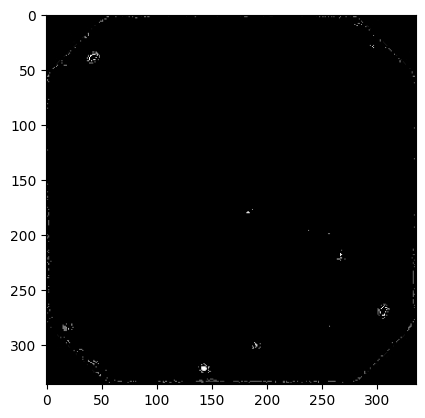

In [ ]:
img_ulcer=cv.cvtColor(mask2, cv.COLOR_RGB2GRAY)
plt.imshow(img_ulcer,cmap='gray')

(336, 336, 3)


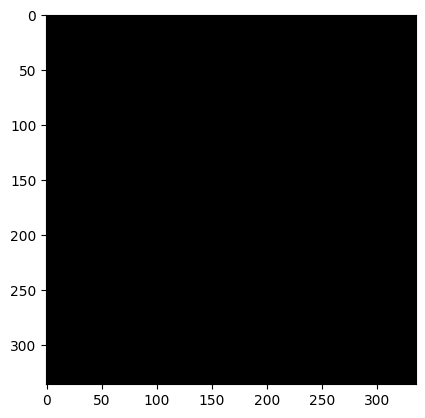

In [ ]:
ret, thresh = cv.threshold(mask2,np.mean(median_topBottom_img),255,cv.THRESH_BINARY)
kernel = disk(3)
thresh = cv.erode(cv.dilate(thresh,kernel,iterations=2),kernel,iterations=7)
segmentation=cv.dilate(thresh,kernel,iterations=10)
print(segmentation.shape)
plt.imshow(segmentation, cmap = 'gray')

No duodenal Cyst Detected


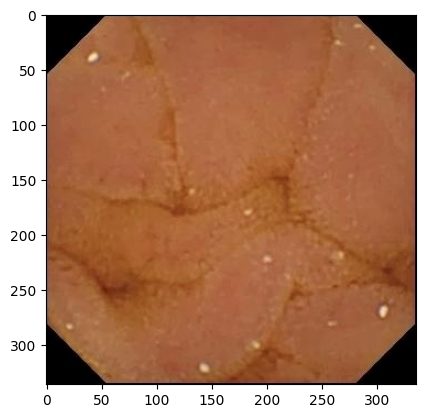

In [ ]:
seg  = cv.cvtColor(segmentation, cv.COLOR_RGB2GRAY)
main = image.copy()
RGBforLabel = { 1:(0,0,255), 2:(1,255,255) }
contours,_ = cv.findContours(seg,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
for i,c in enumerate(contours):
    mask = np.zeros(seg.shape, np.uint8)
    cv.drawContours(mask,[c],-1,255, -1)
    mean,_,_,_ = cv.mean(seg, mask=mask)
    label = 2 if mean > 1.0 else 1
    color = RGBforLabel.get(label)
    cv.drawContours(main,[c],-1,color,5)
plt.imshow(main)
if (label == 2):
  print("duodenal Cyst Detected & represented in Blue colour")
else:
  print("No duodenal Cyst Detected")